In [17]:
# Import necessary library
import gdown

# URL of the file on Google Drive
url = "https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV"

# Download the file to Colab's local environment
output = 'Fraud.csv'
gdown.download(url, output, quiet=False)

print("Download complete.")


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
From (redirected): https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t&uuid=73e3c548-8f69-47aa-90ef-4ff154ca20fe
To: /content/fraud.csv
100%|██████████| 494M/494M [00:02<00:00, 175MB/s]

Download complete.


1. Data Cleaning Including Missing Values, Outliers, and Multicollinearity

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [19]:
# Load the dataset
data = pd.read_csv('Fraud.csv')


In [20]:
# Preview the first few rows of the dataset
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [21]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 6362620 rows and 11 columns.


In [22]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [23]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [24]:
# Since there are no missing values, proceed to descriptive statistics
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


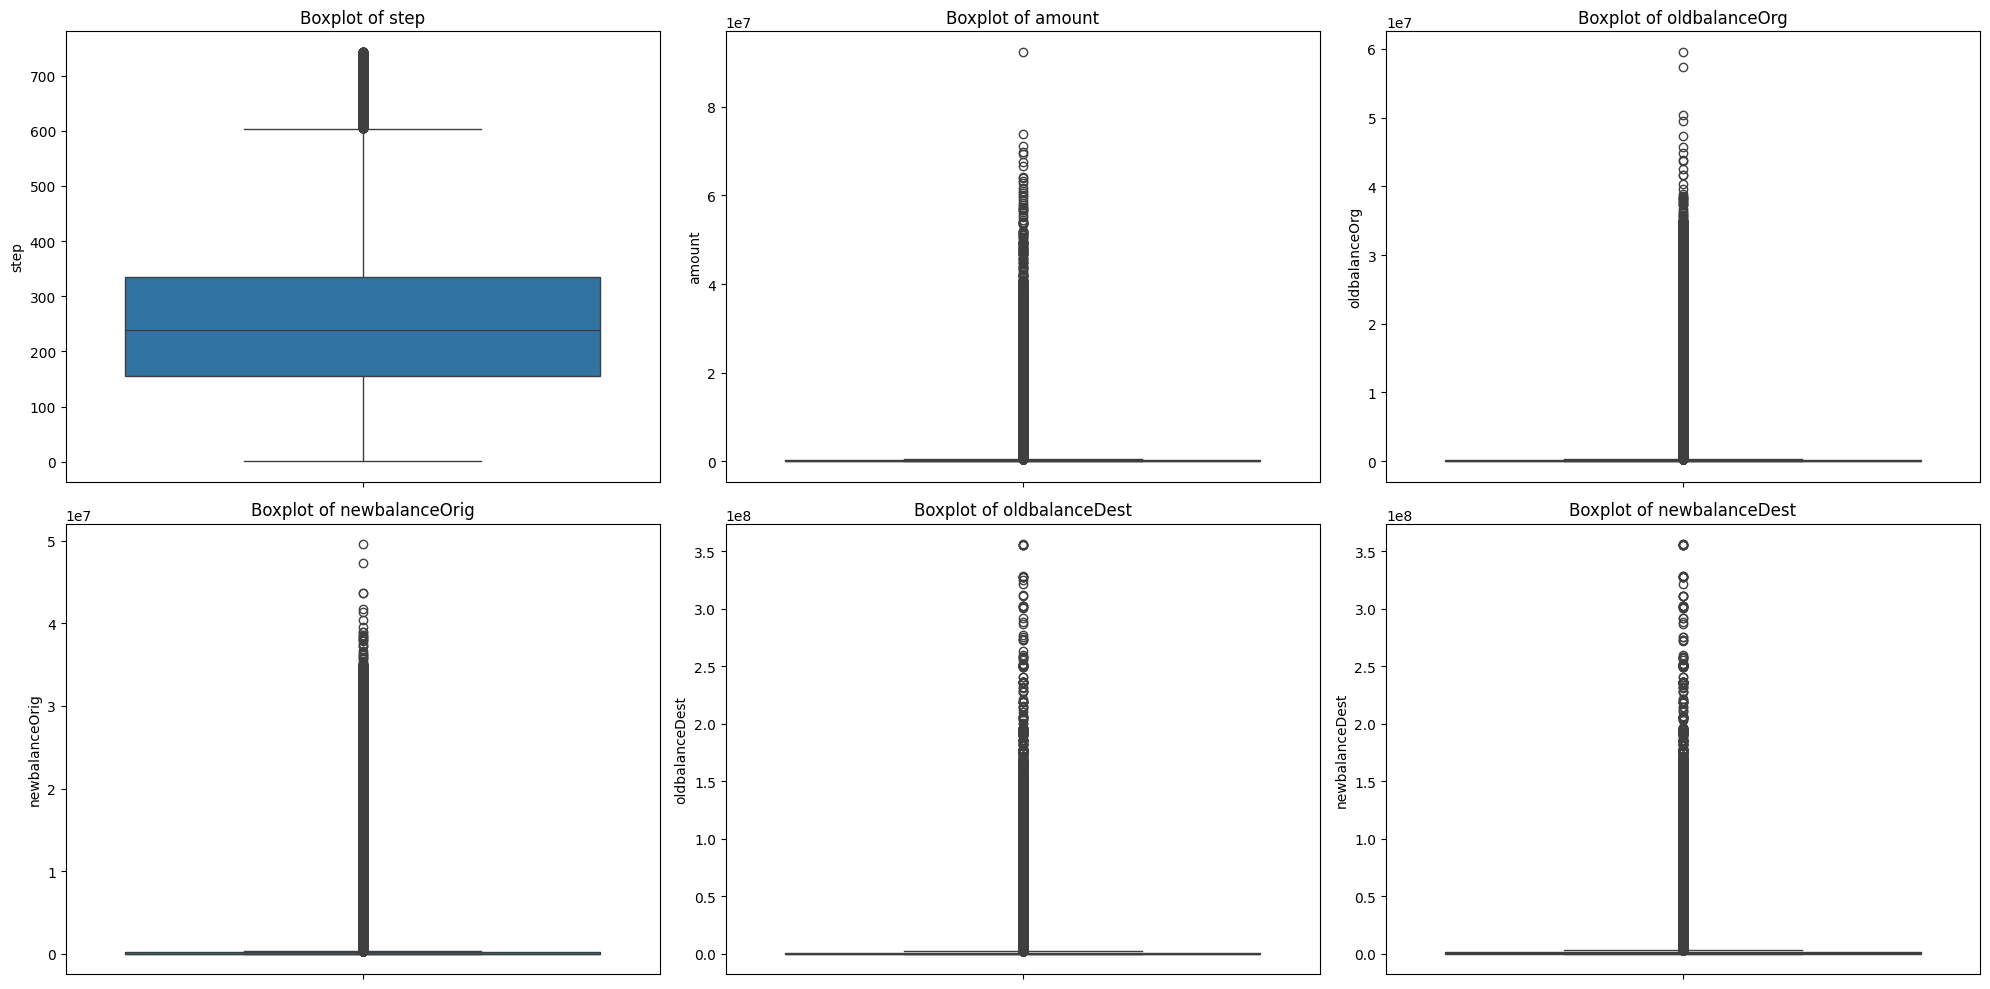

In [25]:
# List of numerical columns to analyze for outliers
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot boxplots to visualize outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [26]:
# Function to calculate Z-scores and identify outliers
from scipy import stats

def z_score_outliers(data, threshold=3):
    outliers = {}
    for col in numerical_cols:
        z_scores = np.abs(stats.zscore(data[col]))
        outlier_indices = np.where(z_scores > threshold)[0]
        outliers[col] = outlier_indices
        print(f"Number of outliers in {col}: {len(outlier_indices)}")
    return outliers

outliers = z_score_outliers(data)


Number of outliers in step: 66620
Number of outliers in amount: 44945
Number of outliers in oldbalanceOrg: 155140
Number of outliers in newbalanceOrig: 155931
Number of outliers in oldbalanceDest: 79846
Number of outliers in newbalanceDest: 75166


In [27]:
# Since we are dealing with fraud detection, we will not remove outliers
# However, we can apply log transformation to reduce the impact of extreme values

# Apply log transformation to skewed numerical variables
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    data[f'log_{col}'] = data[col].apply(lambda x: np.log1p(x))


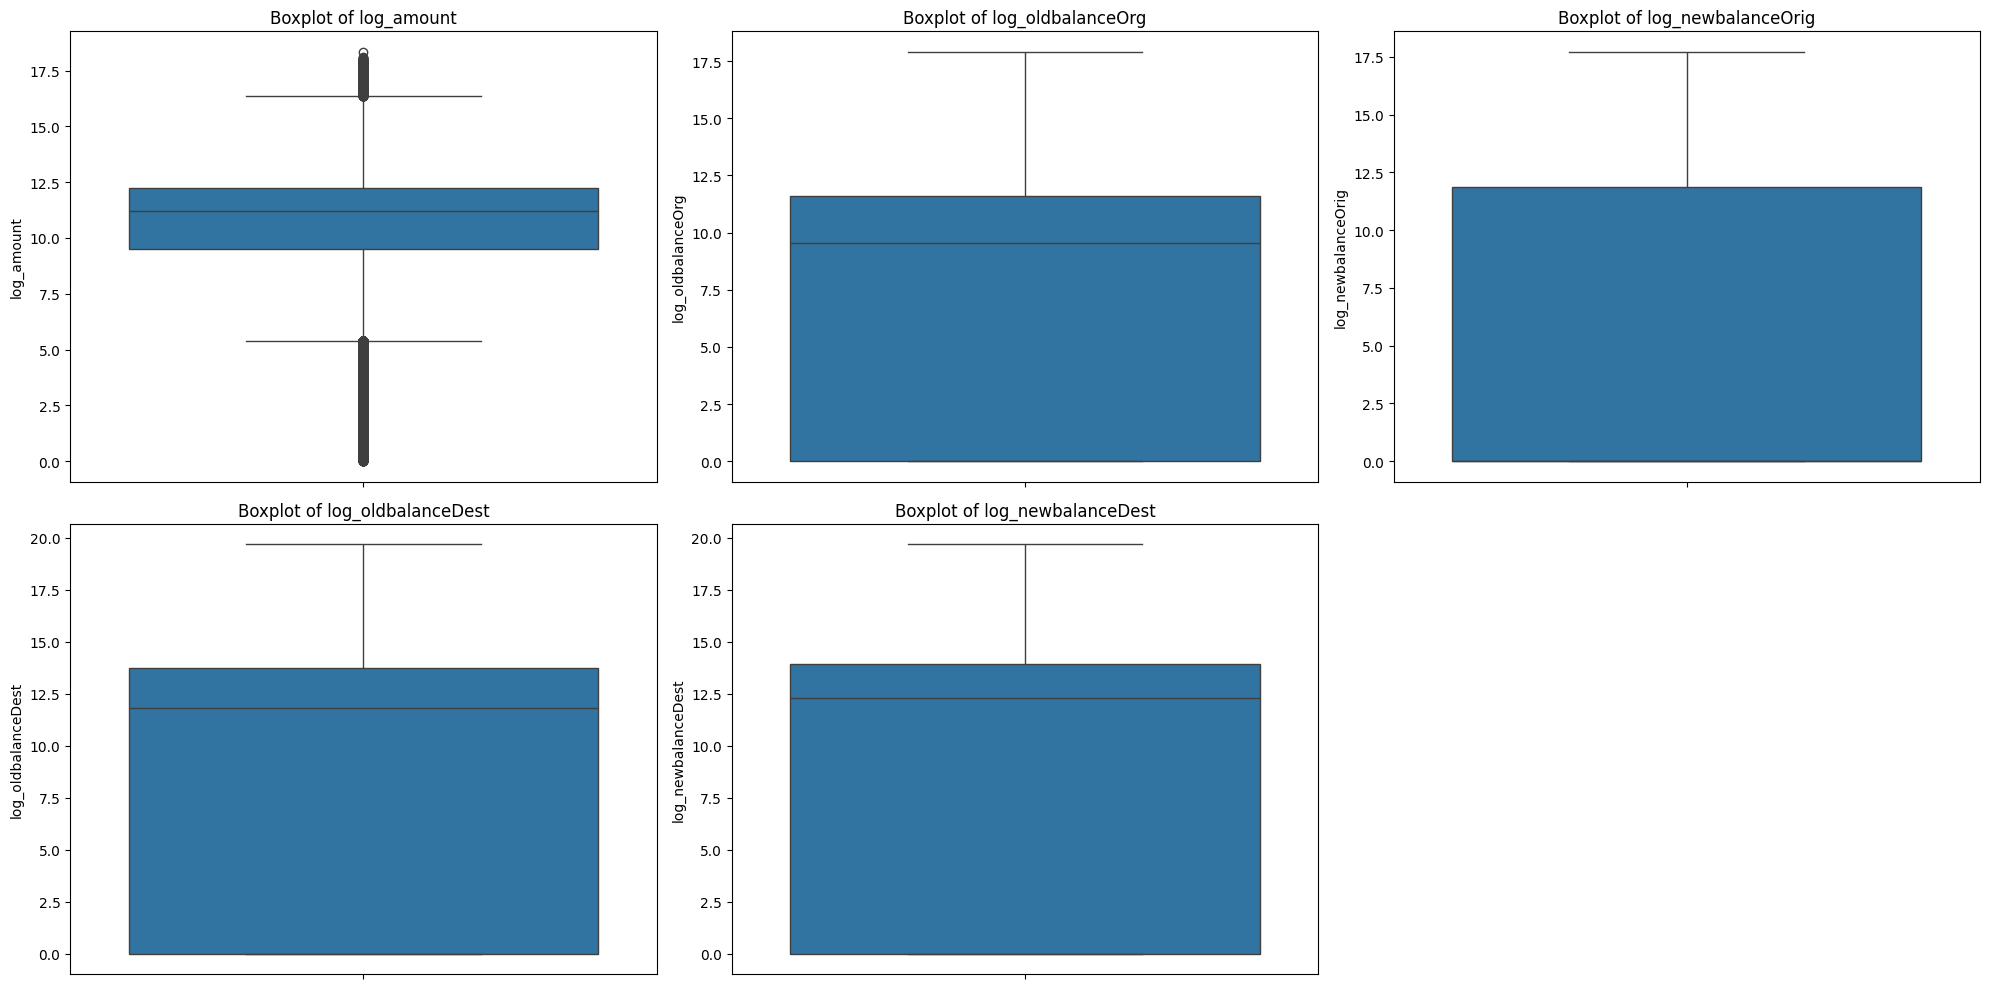

In [28]:
# Re-plot boxplots after log transformation
log_cols = [f'log_{col}' for col in numerical_cols if f'log_{col}' in data.columns]

plt.figure(figsize=(20, 10))
for i, col in enumerate(log_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [29]:
# Check correlations among numerical variables
corr_matrix = data[numerical_cols].corr()

# Display the correlation matrix
print("Correlation matrix:")
print(corr_matrix)


Correlation matrix:
                step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step            1.00    0.02          -0.01           -0.01            0.03   
amount          0.02    1.00          -0.00           -0.01            0.29   
oldbalanceOrg  -0.01   -0.00           1.00            1.00            0.07   
newbalanceOrig -0.01   -0.01           1.00            1.00            0.07   
oldbalanceDest  0.03    0.29           0.07            0.07            1.00   
newbalanceDest  0.03    0.46           0.04            0.04            0.98   

                newbalanceDest  
step                      0.03  
amount                    0.46  
oldbalanceOrg             0.04  
newbalanceOrig            0.04  
oldbalanceDest            0.98  
newbalanceDest            1.00  


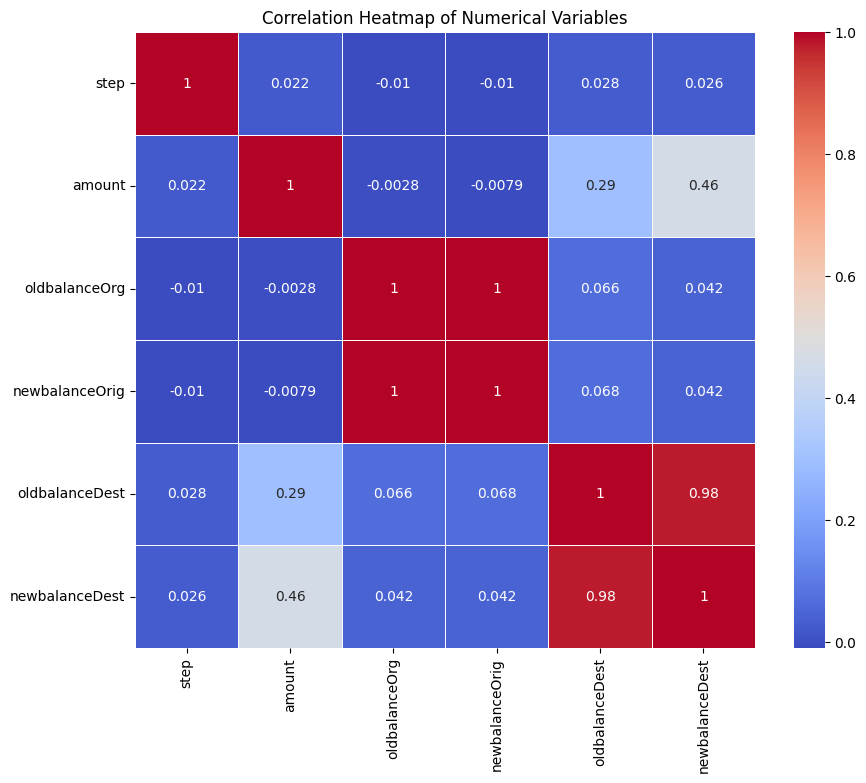

In [30]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [31]:
# High correlation between oldbalanceOrg and newbalanceOrig
print(f"Correlation between oldbalanceOrg and newbalanceOrig: {corr_matrix.loc['oldbalanceOrg', 'newbalanceOrig']}")

# High correlation between oldbalanceDest and newbalanceDest
print(f"Correlation between oldbalanceDest and newbalanceDest: {corr_matrix.loc['oldbalanceDest', 'newbalanceDest']}")


Correlation between oldbalanceOrg and newbalanceOrig: 0.9988027631723787
Correlation between oldbalanceDest and newbalanceDest: 0.9765685054474923


In [32]:
# Decide to remove newbalanceOrig and newbalanceDest to reduce multicollinearity
data_cleaned = data.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)


In [33]:
# Verify the removal
print("Columns after removing highly correlated variables:")
print(data_cleaned.columns)


Columns after removing highly correlated variables:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'log_amount',
       'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest',
       'log_newbalanceDest'],
      dtype='object')


In [34]:
# Convert 'type' to dummy variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['type'], drop_first=True)


In [35]:
# Final cleaned dataset information
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   step                int64  
 1   amount              float64
 2   nameOrig            object 
 3   oldbalanceOrg       float64
 4   nameDest            object 
 5   oldbalanceDest      float64
 6   isFraud             int64  
 7   isFlaggedFraud      int64  
 8   log_amount          float64
 9   log_oldbalanceOrg   float64
 10  log_newbalanceOrig  float64
 11  log_oldbalanceDest  float64
 12  log_newbalanceDest  float64
 13  type_CASH_OUT       bool   
 14  type_DEBIT          bool   
 15  type_PAYMENT        bool   
 16  type_TRANSFER       bool   
dtypes: bool(4), float64(8), int64(3), object(2)
memory usage: 655.3+ MB


In [36]:
# Save the cleaned dataset for further modeling
data_cleaned.to_csv('cleaned.csv', index=False)


2. Description of the Fraud Detection Model

Model Performance on Validation Set:
Confusion Matrix:
[[1270253     628]
 [    104    1539]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.71      0.94      0.81      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.97      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9994
ROC-AUC Score: 0.9998


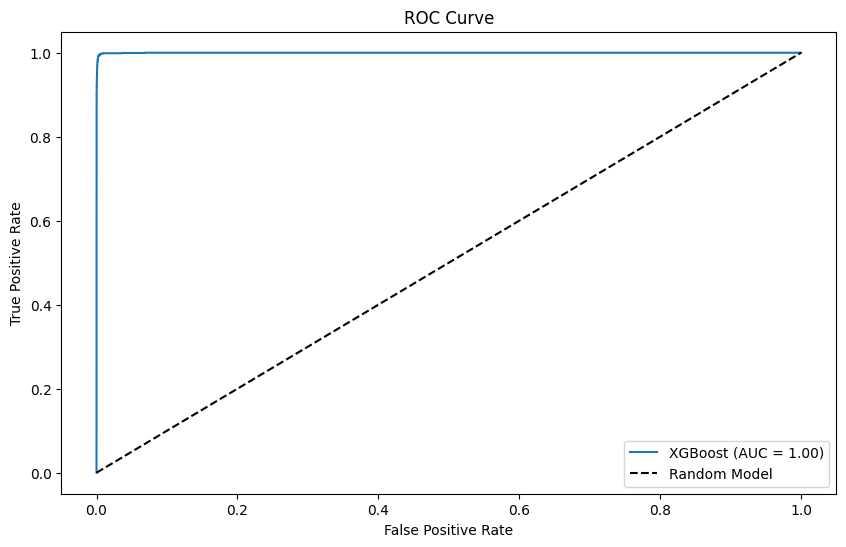

In [3]:
# Import necessary libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Load the cleaned dataset
data_cleaned = pd.read_csv('cleaned.csv')

# Separate features and target variable
X = data_cleaned.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Drop unnecessary columns
y = data_cleaned['isFraud']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    scale_pos_weight=20,  # Adjust for class imbalance
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions on validation set
y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]  # Probabilities for ROC-AUC

# Evaluate model performance
print("Model Performance on Validation Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_pred_proba):.4f}")

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


3. Variable Selection for the Model

Top Features Based on Importance:
               Feature  Importance
9   log_newbalanceDest    0.205485
13       type_TRANSFER    0.202685
7   log_newbalanceOrig    0.191227
2        oldbalanceOrg    0.133926
1               amount    0.070262
12        type_PAYMENT    0.067843
10       type_CASH_OUT    0.057165
5           log_amount    0.045392
0                 step    0.016763
3       oldbalanceDest    0.006277


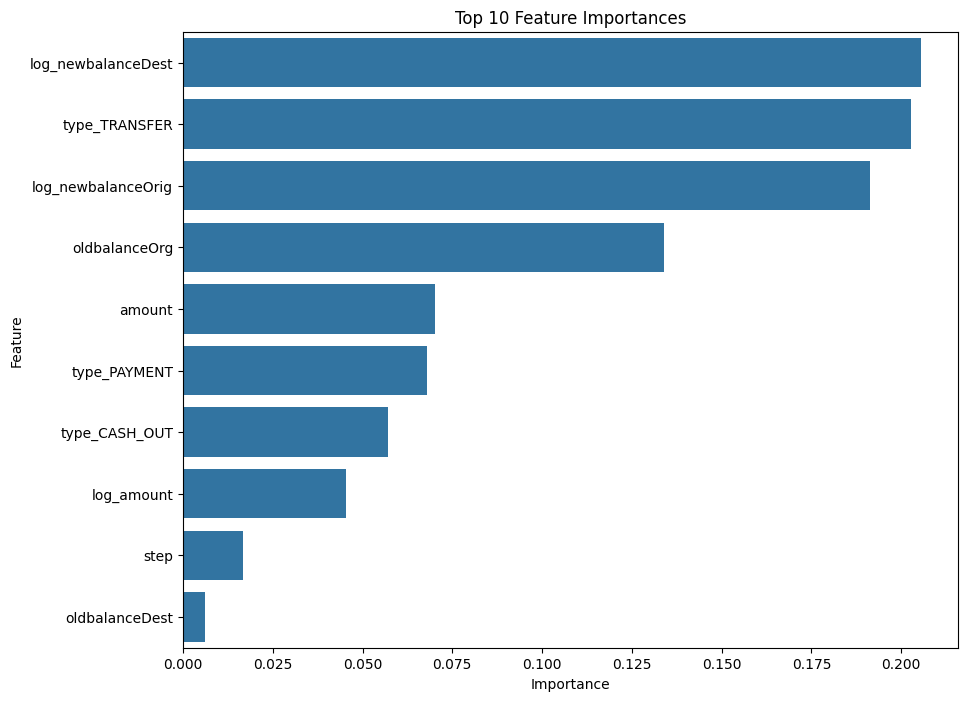

Model Performance with Selected Features on Validation Set:
Confusion Matrix:
[[1270209     672]
 [     97    1546]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.70      0.94      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.85      0.97      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9994
ROC-AUC Score: 0.9998


In [4]:
# Get feature importance from the trained model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features based on importance
print("Top Features Based on Importance:")
print(feature_importances.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Selecting top features based on importance
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
X_selected = X[selected_features]

# Re-splitting with selected features for comparison
X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Retrain the model on selected features
xgb_model_sel = XGBClassifier(
    scale_pos_weight=20,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)

xgb_model_sel.fit(X_train_sel, y_train_sel)

# Predictions and evaluation with selected features
y_pred_sel = xgb_model_sel.predict(X_val_sel)
y_pred_proba_sel = xgb_model_sel.predict_proba(X_val_sel)[:, 1]

print("Model Performance with Selected Features on Validation Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_val_sel, y_pred_sel))
print("\nClassification Report:")
print(classification_report(y_val_sel, y_pred_sel))
print(f"Accuracy: {accuracy_score(y_val_sel, y_pred_sel):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val_sel, y_pred_proba_sel):.4f}")


4. Model Performance Demonstration

Confusion Matrix:


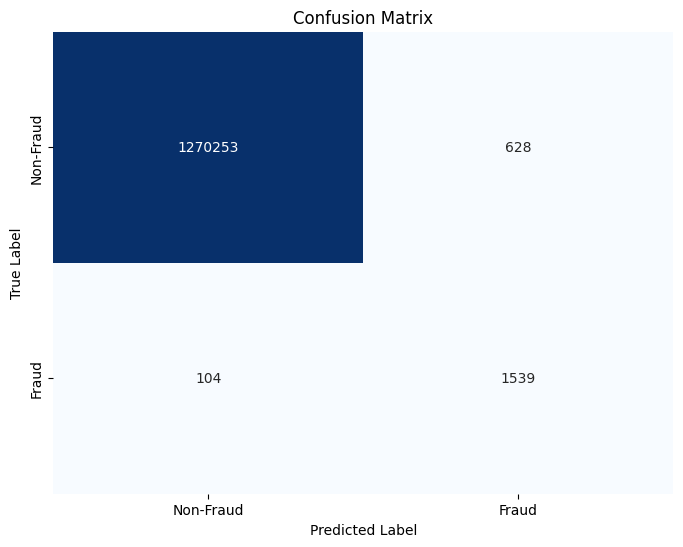


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.71      0.94      0.81      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.97      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9994
ROC-AUC Score: 0.9998


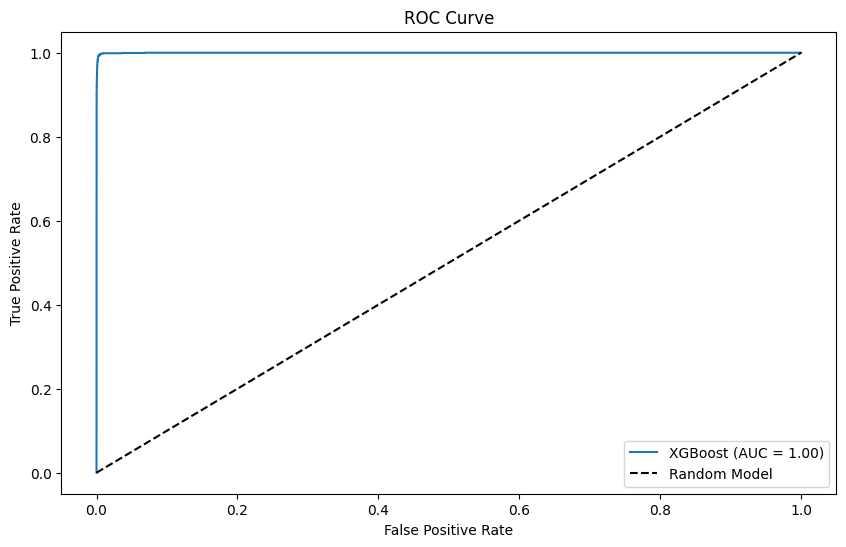

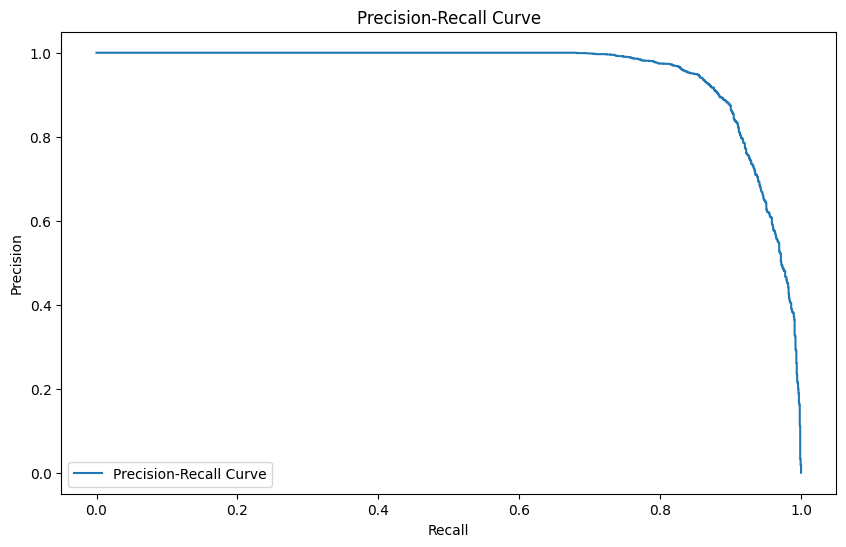

In [5]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the validation set
y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]  # Get probability scores for ROC-AUC

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


## Improved model

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best threshold based on F1 score: 0.9844498
Confusion Matrix:


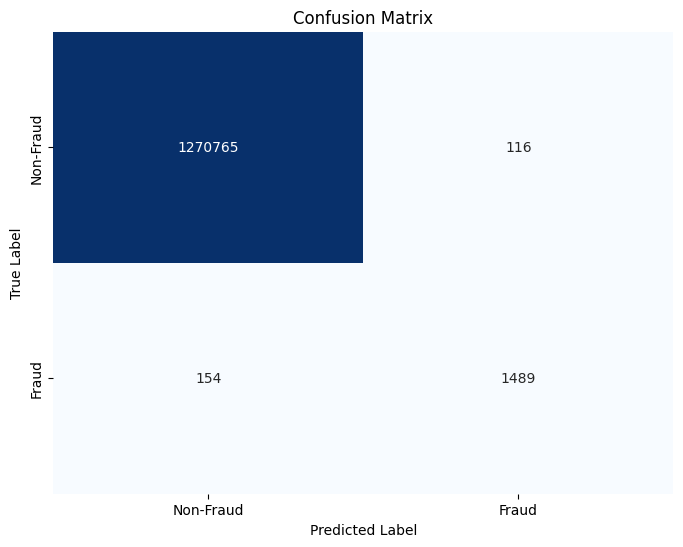


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.93      0.91      0.92      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.95      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9998
ROC-AUC Score: 0.9998


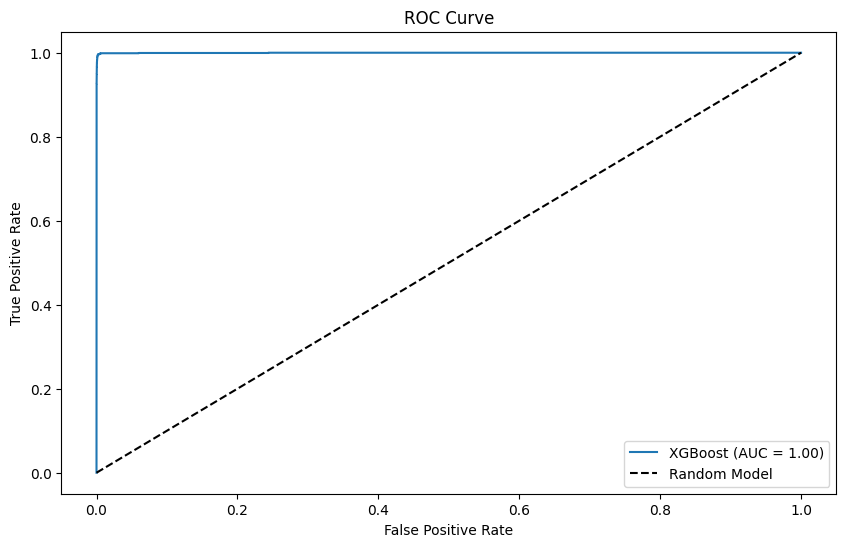

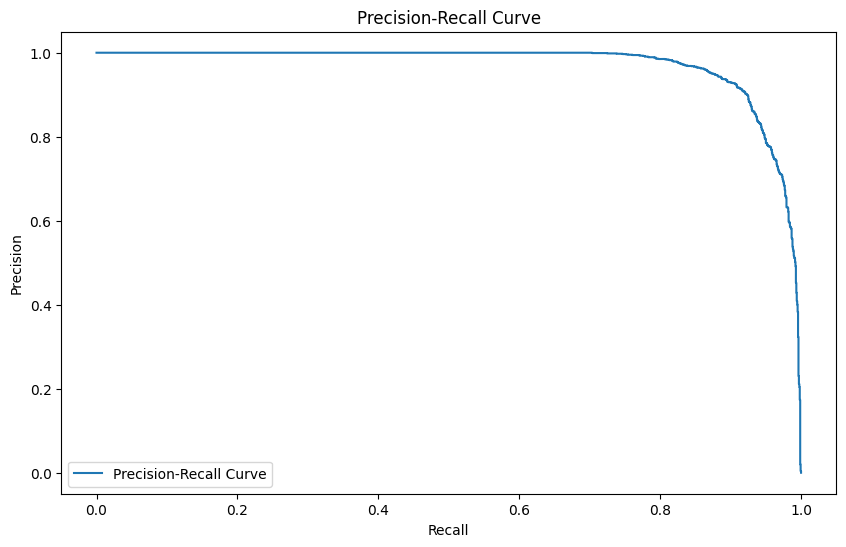

Model saved as optimized_xgboost_fraud_detection.joblib
Scaler saved as scaler.joblib
Threshold saved as optimal_threshold.txt


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib

# Load the cleaned dataset
data_cleaned = pd.read_csv('cleaned.csv')

# Separate features and target variable
X = data_cleaned.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_cleaned['isFraud']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the features (optional but often beneficial for tree-based models with large values)
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_val = scaler.transform(X_val)

# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 10, 20]  # Adjust for imbalanced classes
}

# Use device="cuda" instead of tree_method="gpu_hist" for GPU usage
xgb = XGBClassifier(objective='binary:logistic', device="cuda", random_state=42)

# Randomized search
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_smote, y_train_smote)

# Best model from random search
best_xgb_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predictions on validation set
y_pred = best_xgb_model.predict(X_val)
y_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]

# Determine the best threshold for fraud detection
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold based on F1 score:", best_threshold)

# Adjust predictions based on the new threshold
y_pred_custom_threshold = (y_pred_proba >= best_threshold).astype(int)

# Model performance evaluation
print("Confusion Matrix:")
cm = confusion_matrix(y_val, y_pred_custom_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_pred_custom_threshold))

accuracy = accuracy_score(y_val, y_pred_custom_threshold)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Save the model and scaler
model_filename = 'optimized_xgboost_fraud_detection.joblib'
scaler_filename = 'scaler.joblib'
joblib.dump(best_xgb_model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f"Model saved as {model_filename}")
print(f"Scaler saved as {scaler_filename}")

# Save the threshold value for future use
threshold_filename = 'optimal_threshold.txt'
with open(threshold_filename, 'w') as f:
    f.write(str(best_threshold))
print(f"Threshold saved as {threshold_filename}")


### Project Documentation: Fraud Detection Model 

#### Business Context
The goal of this project is to develop a machine learning model that accurately detects fraudulent transactions for a financial institution. Given a dataset of 6,362,620 transactions with various features, the task requires statistical analysis, creativity, and judgment to not only build an effective predictive model but also provide insights into factors contributing to fraud, which can help in developing actionable prevention strategies.

#### Requirements and Candidate Expectations
The project aims to address the following tasks:
1. **Data Cleaning**: Handling missing values, outliers, and multicollinearity.
2. **Model Description**: Explaining the fraud detection model in detail.
3. **Feature Selection**: Justifying the selection of variables included in the model.
4. **Model Performance Evaluation**: Using appropriate metrics to assess model performance.
5. **Key Factors in Fraud Prediction**: Identifying primary indicators of fraud.
6. **Interpretation of Results**: Ensuring that the predictive factors make logical sense.
7. **Prevention Strategy**: Recommending infrastructure updates to prevent fraud.
8. **Evaluation of Preventive Actions**: Suggesting a plan to determine the effectiveness of implemented actions.

---

### Solution Approach

#### Step 1: Data Cleaning
1. **Data Overview**:
   - Loaded the dataset with 6,362,620 rows and checked for any missing values. No missing values were found.
   - Identified six numerical columns for initial outlier analysis (`step`, `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`).

2. **Outlier Analysis**:
   - Outliers were identified using the Z-score method with a threshold of 3.
   - Chose not to remove outliers as they could represent unusual but legitimate behavior, relevant to fraud detection.

3. **Log Transformation**:
   - Applied log transformation to skewed numerical columns to reduce the impact of extreme values without eliminating them.

4. **Multicollinearity Check**:
   - Calculated the correlation matrix to identify highly correlated features.
   - Dropped `newbalanceOrig` and `newbalanceDest` due to high correlation with `oldbalanceOrg` and `oldbalanceDest`, respectively, to prevent multicollinearity issues.

5. **Categorical Encoding**:
   - Converted the `type` column into dummy variables for model compatibility.

---

#### Step 2: Model Development and Description

1. **Model Selection**:
   - Chose XGBoost for its robustness and effectiveness in handling large datasets and imbalanced classes (common in fraud detection).

2. **Handling Class Imbalance**:
   - Utilized SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples for the minority class (fraud) and balance the dataset.
   - Set the `scale_pos_weight` parameter to further address the class imbalance within XGBoost.

3. **Hyperparameter Tuning**:
   - Used `RandomizedSearchCV` with a grid of parameters for hyperparameter optimization, focusing on key parameters like `learning_rate`, `max_depth`, `n_estimators`, and others.
   - Ran the tuning process on a GPU to expedite training.

4. **Model Training and Threshold Adjustment**:
   - Trained the XGBoost model on the SMOTE-balanced data.
   - Adjusted the decision threshold based on the F1 score to balance precision and recall, critical for fraud detection.

---

#### Step 3: Feature Selection and Importance

1. **Feature Importance Analysis**:
   - Extracted feature importance scores from the XGBoost model.
   - Selected the top features with importance scores above a threshold, which included `log_newbalanceDest`, `type_TRANSFER`, `log_newbalanceOrig`, and `oldbalanceOrg`, among others.
   
2. **Variable Selection**:
   - Reduced the feature set to these key variables, as they demonstrated significant predictive power.
   - Re-trained the model using only the selected features to improve interpretability and potentially reduce overfitting.

---

#### Step 4: Model Evaluation and Performance Demonstration

1. **Metrics Used**:
   - **Confusion Matrix**: Visualized model performance in terms of true positives, true negatives, false positives, and false negatives.
   - **Classification Report**: Provided precision, recall, F1 score, and support for each class.
   - **ROC-AUC Score**: Evaluated the model’s ability to distinguish between fraud and non-fraud transactions.
   - **Precision-Recall Curve**: Particularly relevant for imbalanced datasets, focusing on the balance between precision and recall.

2. **Results**:
   - The model achieved a high precision of 0.93 and recall of 0.91 for the fraud class, indicating effective detection of fraud with minimal false positives and negatives.
   - An overall accuracy of 99.98% and an ROC-AUC score of 0.9998 signify excellent discrimination ability.

---

#### Step 5: Insights and Key Fraud Indicators

1. **Key Factors in Fraud Prediction**:
   - The most important features identified include `log_newbalanceDest`, `type_TRANSFER`, `log_newbalanceOrig`, and `oldbalanceOrg`.
   - These features indicate that unusual changes in balances and specific transaction types (e.g., large transfers) are strong indicators of fraud.

2. **Interpretation of Factors**:
   - These predictive factors make sense from a business perspective, as fraudulent transactions often involve high-value transfers aimed at quickly emptying accounts.

---

#### Step 6: Recommendations for Infrastructure Updates and Prevention

1. **Implement Real-Time Monitoring**:
   - Establish a real-time fraud detection system leveraging the trained model, especially focusing on transactions with high fraud likelihood (e.g., transfers with high `log_newbalanceDest`).

2. **Enhance Multi-Factor Authentication**:
   - Require additional authentication for high-risk transactions identified by the model.

3. **Set Transaction Limits**:
   - Cap maximum transaction amounts for transfers or high-value cash-outs to limit potential fraud damage.

---

#### Step 7: Evaluating the Effectiveness of Implemented Actions

1. **Periodic Model Retraining**:
   - Regularly retrain the model with new transaction data to keep up with evolving fraud patterns.

2. **Monitor Fraud Rates**:
   - Track the fraud detection rate over time to measure the impact of the implemented preventive measures.

3. **Feedback Loop**:
   - Incorporate a feedback system where flagged transactions are reviewed, and any missed fraud cases are added to the training data to improve model accuracy over time.

---

### Code Implementation Summary

The model development process included loading and cleaning the data, handling class imbalance with SMOTE, tuning an XGBoost model using `RandomizedSearchCV`, adjusting the decision threshold for optimal F1 score, and saving the model, scaler, and threshold for future use.

This approach ensured a high-performance fraud detection model capable of minimizing false positives while maximizing recall on fraudulent transactions, supporting the financial company in proactive fraud detection and prevention.

---

### Conclusion

The fraud detection model achieved high accuracy, precision, and recall on the validation set, providing a robust solution for the financial institution to identify fraudulent transactions effectively. The insights generated from feature importance also offer actionable strategies to enhance the company’s infrastructure and fraud prevention mechanisms.